In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

In [67]:
# Atlanta Data
csv_path = "Resources/AtlMoon.csv"
atl_df = pd.read_csv(csv_path)
atl_df.head()

,Date,Crime Count,Moon Phase,Special,Special Type
0,1/1/15,87.0,NaN,NaN,NaN
1,1/10/15,71.0,NaN,NaN,NaN
2,1/11/15,82.0,NaN,NaN,NaN
3,1/12/15,95.0,NaN,NaN,NaN
4,1/13/15,64.0,Third Quarter,n,NaN


In [68]:
new_df = atl_df.groupby(['Moon Phase'])['Crime Count'].sum()
new_df

Moon Phase
First Quarter     985.0
Full Moon        1081.0
New Moon          987.0
Third Quarter    1001.0
Name: Crime Count, dtype: float64

Text(0, 0.5, 'Crime Count')

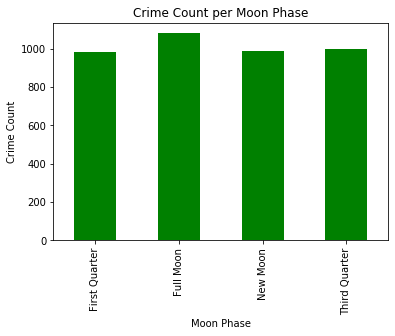

In [69]:
crime_moon_graph = new_df.plot(kind="bar", color="green")

plt.title('Crime Count per Moon Phase')
plt.xlabel('Moon Phase')
plt.ylabel('Crime Count')

In [70]:
# Portlabd Data
csv_path = "Resources/pdxMoon.csv"
pdx_df = pd.read_csv(csv_path)
pdx_df.head()

,Date,Crime Count,Moon Phase,Special,Special Type
0,1/1/2015,44.0,NaN,NaN,NaN
1,1/10/2015,1.0,NaN,NaN,NaN
2,1/11/2015,3.0,NaN,NaN,NaN
3,1/12/2015,2.0,NaN,NaN,NaN
4,1/13/2015,3.0,Third Quarter,n,NaN


In [71]:
new_df = pdx_df.groupby(['Moon Phase'])['Crime Count'].sum()
new_df

Moon Phase
First Quarter    1245.0
Full Moon        1360.0
New Moon         1269.0
Third Quarter    1174.0
Name: Crime Count, dtype: float64

Text(0, 0.5, 'Crime Count')

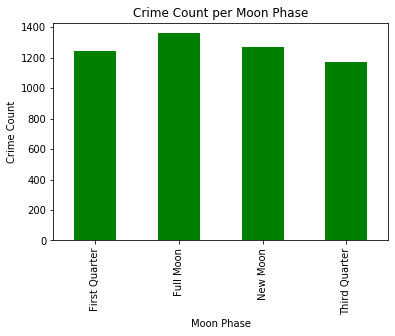

In [72]:
crime_moon_graph = new_df.plot(kind="bar", color="green")

plt.title('Crime Count per Moon Phase')
plt.xlabel('Moon Phase')
plt.ylabel('Crime Count')

In [73]:
# Chicago Data


In [76]:
# NASA Data
csv_path = "NASAmeans"
nasa_df = pd.read_csv(csv_path)

nasa_df

,day,phase
0,01 Apr,91.903333
1,01 Aug,98.278750
2,01 Dec,67.615417
3,01 Feb,94.082500
4,01 Jan,85.044000
...,...,...
360,31 Jan,88.698750
361,31 Jul,99.752500
362,31 Mar,86.065417
363,31 May,94.723750


In [77]:
day = nasa_df.day.str[0:2]
month = nasa_df.day.str[3:6]
nasa_df['Day'] = day
nasa_df['Mon'] = month
nasa_df

,day,phase,Day,Mon
0,01 Apr,91.903333,01,Apr
1,01 Aug,98.278750,01,Aug
2,01 Dec,67.615417,01,Dec
3,01 Feb,94.082500,01,Feb
4,01 Jan,85.044000,01,Jan
...,...,...,...,...
360,31 Jan,88.698750,31,Jan
361,31 Jul,99.752500,31,Jul
362,31 Mar,86.065417,31,Mar
363,31 May,94.723750,31,May


In [120]:
nasa_df.loc[nasa_df['Mon'] == 'Jan', 'Month'] = 'January'  
nasa_df.loc[nasa_df['Mon'] == 'Feb', 'Month'] = 'February'  
nasa_df.loc[nasa_df['Mon'] == 'Mar', 'Month'] = 'March'  
nasa_df.loc[nasa_df['Mon'] == 'Apr', 'Month'] = 'April'  
nasa_df.loc[nasa_df['Mon'] == 'May', 'Month'] = 'May'  
nasa_df.loc[nasa_df['Mon'] == 'Jun', 'Month'] = 'June'  
nasa_df.loc[nasa_df['Mon'] == 'Jul', 'Month'] = 'July'  
nasa_df.loc[nasa_df['Mon'] == 'Aug', 'Month'] = 'August'  
nasa_df.loc[nasa_df['Mon'] == 'Sep', 'Month'] = 'Spetember'  
nasa_df.loc[nasa_df['Mon'] == 'Oct', 'Month'] = 'October'  
nasa_df.loc[nasa_df['Mon'] == 'Nov', 'Month'] = 'November'  
nasa_df.loc[nasa_df['Mon'] == 'Dec', 'Month'] = 'December'  
nasa_df

date = day + '/' + month +  "/" + "15"

nasa_df['Date'] = date

nasa_df['Date'] = pd.to_datetime(nasa_df.Date)
nasa_df['Date'] = nasa_df['Date'].dt.strftime('%m/%d/%Y')
nasa_df.Date = nasa_df.Date.str.replace('2015', '15')
nasa_df.Date = nasa_df.Date.str.replace('01', '1')
nasa_df.Date = nasa_df.Date.str.replace('02', '2')
nasa_df.Date = nasa_df.Date.str.replace('03', '3')
nasa_df.Date = nasa_df.Date.str.replace('04', '4')
nasa_df.Date = nasa_df.Date.str.replace('05', '5')
nasa_df.Date = nasa_df.Date.str.replace('06', '6')
nasa_df.Date = nasa_df.Date.str.replace('07', '7')
nasa_df.Date = nasa_df.Date.str.replace('08', '8')
nasa_df.Date = nasa_df.Date.str.replace('09', '9')



nasa_cleaned = pd.DataFrame({"Moon Phase": nasa_df['phase'],
                            "Date": nasa_df['Date']})

nasa_cleaned.head()
# Export as csv
nasa_cleaned.to_csv("nasa_cleaned.csv")

In [110]:
crime_moon_atl = pd.merge(nasa_cleaned, atl_df, how="outer", on = "Date")

crime_moon_df

,Moon Phase_x,Date,Crime Count,Moon Phase_y,Special,Special Type
0,91.903333,4/1/15,97.0,NaN,NaN,NaN
1,98.278750,8/1/15,101.0,NaN,NaN,NaN
2,67.615417,12/1/15,83.0,NaN,NaN,NaN
3,94.082500,2/1/15,79.0,NaN,NaN,NaN
4,85.044000,1/1/15,87.0,NaN,NaN,NaN
...,...,...,...,...,...,...
361,99.752500,7/31/15,97.0,Full Moon,y,Blue Moon
362,86.065417,3/31/15,57.0,NaN,NaN,NaN
363,94.723750,5/31/15,71.0,NaN,NaN,NaN
364,79.571667,10/31/15,100.0,NaN,NaN,NaN


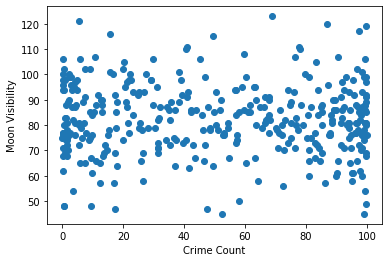

In [119]:
# Crime Count Vs Visible Moon (%) Linear Regression
y_values = crime_moon_df['Crime Count']
x_values = crime_moon_df['Moon Phase_x']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(45,30),fontsize=15,color="red")

plt.ylabel("Moon Visibility")
plt.xlabel("Crime Count")
plt.show()

# plt.savefig("CrimeVsMoonViz.png")